In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import roc_auc_score
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn import preprocessing

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Users\ASUS\anaconda3\python.exe
3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=9, micro=12, releaselevel='final', serial=0)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from joblib import Parallel, delayed
import joblib

In [ ]:
conda create -n newevent anaconda python=3.9.12

Loading the Training Data

In [6]:
df = pd.read_csv("C__Users_Bob_Desktop_my_data.csv")
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
257669,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
257670,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
257671,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [7]:
from sklearn.utils import shuffle
df = shuffle(df,random_state=50)

In [8]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder1 = preprocessing.LabelEncoder()
df['proto']= label_encoder1.fit_transform(df['proto'])
  
df['proto'].unique()
label_encoder2 = preprocessing.LabelEncoder()
df['attack_cat']= label_encoder2.fit_transform(df['attack_cat'])
  
df['attack_cat'].unique()

label_encoder3 = preprocessing.LabelEncoder()
df['service']= label_encoder3.fit_transform(df['service'])
  
df['service'].unique()
label_encoder4 = preprocessing.LabelEncoder()
df['state']= label_encoder4.fit_transform(df['state'])
  
df['state'].unique()

array([ 2,  4,  5,  7,  9,  8,  3,  0,  6, 10,  1])

In [9]:
y=df['attack_cat']
#y1=df.iloc[:,-1]
x_k=df.drop(['label','attack_cat','id'],axis=1)
#y= df['attack_cat']

In [10]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x_k,y)
mutual_data=pd.Series(mutual_info,index=x_k.columns)
mutual_data.sort_values(ascending=False)

sbytes               1.090867
smean                0.886964
sload                0.861778
dbytes               0.586765
dmean                0.503957
rate                 0.496223
dur                  0.484724
ct_dst_sport_ltm     0.477976
service              0.473818
proto                0.466876
ct_state_ttl         0.459509
ct_srv_dst           0.446234
dload                0.444676
dttl                 0.440193
dinpkt               0.438073
dpkts                0.424188
ct_src_dport_ltm     0.423441
ct_srv_src           0.416071
sinpkt               0.404355
sttl                 0.401568
ct_dst_src_ltm       0.394218
ct_dst_ltm           0.381335
synack               0.371150
tcprtt               0.368470
sjit                 0.360324
ackdat               0.358466
spkts                0.346746
djit                 0.334987
state                0.324242
dloss                0.317447
ct_src_ltm           0.315571
sloss                0.287781
stcpb                0.218307
dtcpb     

In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_k_1= sc.fit_transform(x_k)

x = pd.DataFrame(x_k_1)

x.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,2.881667e-05,0.901515,0.000000,0.2,0.000282,0.000363,0.000035,0.000021,0.004049,0.121569,...,0.034483,0.000000,0.000000,0.031250,0.0,0.0,0.000000,0.067797,0.081967,0.0
1,3.751644e-02,0.856061,0.750000,0.4,0.008361,0.002723,0.006857,0.000153,0.000053,0.243137,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,3.369212e-02,0.856061,0.000000,0.2,0.000470,0.000182,0.000069,0.000006,0.000003,0.243137,...,0.034483,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.032787,0.0
3,5.000001e-08,0.901515,0.166667,0.5,0.000094,0.000000,0.000006,0.000000,0.333333,0.996078,...,0.068966,0.068966,0.088889,0.453125,0.0,0.0,0.000000,0.084746,0.475410,0.0
4,2.057985e-02,0.856061,0.416667,0.4,0.001221,0.001634,0.000116,0.000694,0.000025,0.121569,...,0.103448,0.000000,0.000000,0.000000,0.0,0.0,0.033333,0.033898,0.016393,0.0


In [12]:
y.head()

200566    6
226191    3
245537    6
198365    5
200520    6
Name: attack_cat, dtype: int32

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=946,stratify=y)

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\ASUS\anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Users\ASUS\anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\ASUS\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\ASUS\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\ASUS\anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
socket.time

In [11]:
#from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

ModuleNotFoundError: No module named 'tensorflow'

Train Model for Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB
Gnb = GaussianNB()

In [15]:
Gnb.fit(X_train,y_train)

GaussianNB()

In [16]:
joblib.dump(Gnb, 'UNSW_GaussianNaiveBayes_Zero_HyperParameter.pkl')

['UNSW_GaussianNaiveBayes_Zero_HyperParameter.pkl']

Train Model for Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [18]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [20]:
joblib.dump(RF, 'UNSW_RandomForestClassifier_Zero_HyperParameter.pkl')

['UNSW_RandomForestClassifier_Zero_HyperParameter.pkl']

Train Model with Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(max_iter=1000)

In [27]:
Lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [19]:
joblib.dump(Lr, 'UNSW_LogisticRegression_Zero_HyperParameter.pkl')

['UNSW_LogisticRegression_Zero_HyperParameter.pkl']

Train Model with KNN Classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier()

In [21]:
Knn.fit(X_train,y_train)

KNeighborsClassifier()

In [22]:
joblib.dump(Knn, 'UNSW_KNeighborsClassifier_Zero_HyperParameter.pkl')

['UNSW_KNeighborsClassifier_Zero_HyperParameter.pkl']

Train Model with Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier()

In [24]:
Dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
joblib.dump(Dt, 'UNSW_DecisionTreeClassifier_Zero_HyperParameter.pkl')

['UNSW_DecisionTreeClassifier_Zero_HyperParameter.pkl']

Training with ANN model

In [28]:
model = keras.Sequential([
        keras.layers.Dense(3, input_dim=3, activation='relu'),
        #keras.layers.Dropout(0.5),
        keras.layers.Dense(56, activation='relu'),
        #keras.layers.Dropout(0.5),
        #keras.layers.Dense(56, activation='relu'),
        #keras.layers.Dropout(0.5),
        keras.layers.Dense(113, activation='softmax')
    ])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
    
    #if weights == -1:
model.fit(x_k_m,y_l, epochs=20)
    #else:

NameError: name 'keras' is not defined

In [47]:
joblib.dump(model, 'ANN_model.pkl')

NameError: name 'model' is not defined

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
from xgboost import XGBClassifier

In [22]:
import xgboost as xgb

Train with XGB classifer

In [23]:
Xg = XGBClassifier()

In [24]:
Xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [25]:
joblib.dump(Xg, 'UNSW_XGBclassifer_Zero_HyperParameter.pkl')

['UNSW_XGBclassifer_Zero_HyperParameter.pkl']

Adaboost Classifier

In [26]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier()

In [27]:
Ada.fit(X_train,y_train)

AdaBoostClassifier()

In [28]:
joblib.dump(Ada, 'UNSW_AdaBoostClassifier_Zero_HyperParameter.pkl')

['UNSW_AdaBoostClassifier_Zero_HyperParameter.pkl']

Extra Tree Classifer

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
Ex_tree = ExtraTreesClassifier()

In [30]:
Ex_tree.fit(X_train,y_train)

ExtraTreesClassifier()

In [48]:
joblib.dump(Ex_tree, 'UNSW_ExtraTreesClassifier_Zero_HyperParameter.pkl')

['UNSW_ExtraTreesClassifier_Zero_HyperParameter.pkl']

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
gradboost=GradientBoostingClassifier()

In [86]:
gradboost.fit(X_train,y_train)

GradientBoostingClassifier()

In [84]:
joblib.dump(gradboost,'UNSW_GradientBoostingClassifier_Zero_HyperParameter.pkl')

['UNSW_GradientBoostingClassifier_Zero_HyperParameter.pkl']

Testing Data Loading

Testing with Gaussian Naive Bayes

In [32]:
classes=label_encoder2.classes_
def multiclass_ROC(y_test,y_pred_proba):
            y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

            # roc curve for classes
            fpr = {}
            tpr = {}
            thresh ={}
            roc_auc = dict()

            n_class = classes.shape[0]

            for i in range(n_class):    
                fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], y_pred_proba[:,i])
                roc_auc[i] = auc(fpr[i], tpr[i])
                
                # plotting  
                plt.rcParams["figure.figsize"] = (15,10)  
                plt.plot(fpr[i], tpr[i], linestyle='--', 
                        label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

            plt.plot([0,1],[0,1],'b--')
            plt.xlim([0,1])
            plt.ylim([0,1.05])
            plt.title('Multiclass ROC curve')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive rate')
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            #plt.legend(loc='lower center')
            plt.show()

In [37]:
predict_gnb = Gnb.predict(X_test)

In [38]:
Gnb.score(X_test,y_test)

0.4293004754050645

In [28]:
from sklearn.metrics import classification_report

In [40]:
print("Classification Report: GaussNB \n", classification_report(y_test, predict_gnb,digits=5))

Classification Report: GaussNB 
               precision    recall  f1-score   support

           0    0.05064   0.20561   0.08127       535
           1    0.03831   0.73605   0.07283       466
           2    0.04044   0.00673   0.01153      3271
           3    0.33036   0.16216   0.21754      8905
           4    0.43287   0.13364   0.20422      4849
           5    0.95507   0.89553   0.92434     11774
           6    0.99117   0.44683   0.61597     18600
           7    0.13486   0.14117   0.13794      2798
           8    0.03500   0.99007   0.06761       302
           9    0.00258   0.22857   0.00510        35

    accuracy                        0.42930     51535
   macro avg    0.30113   0.39463   0.23384     51535
weighted avg    0.68472   0.42930   0.50043     51535



In [41]:
roc_auc_score(y_test, Gnb.predict_proba(X_test), multi_class='ovr')

0.8316461346412986

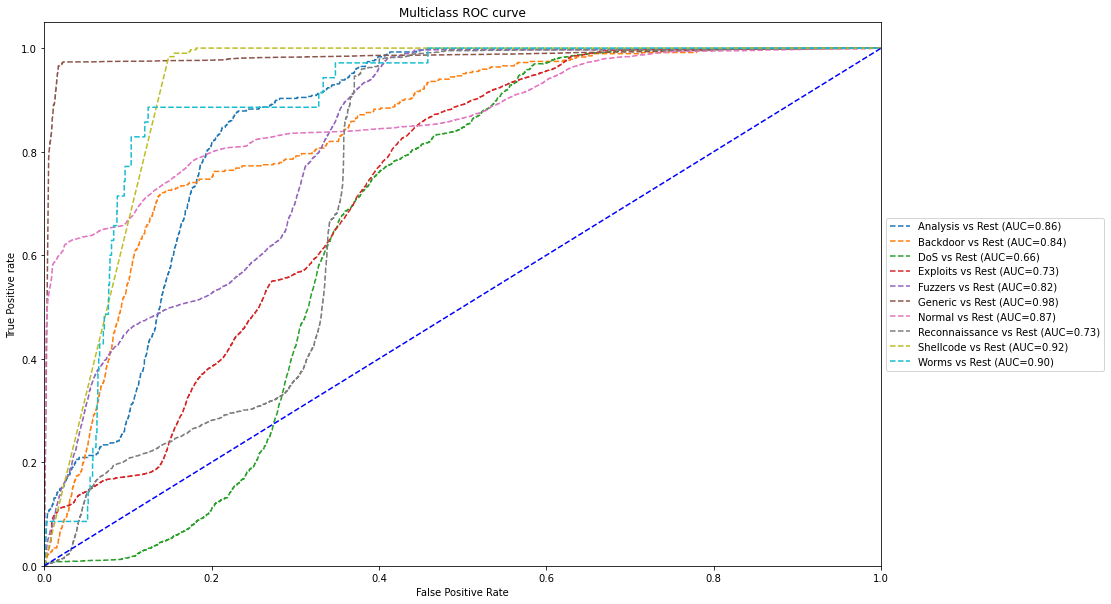

In [42]:
predict_gnb_proba = Gnb.predict_proba(X_test)
multiclass_ROC(y_test,predict_gnb_proba)

In [43]:
from sklearn.metrics import confusion_matrix
CM_GaussNB_multiclass = confusion_matrix(y_test,predict_gnb)
print('Confusion Matrix: GaussNB_Multiclass \n',CM_GaussNB_multiclass)

Confusion Matrix: GaussNB_Multiclass 
 [[  110   365     0     1     1     6     1     0    47     4]
 [   15   343     2     2     0     5     0     7    82    10]
 [  161  2128    22    75    18    23     1    70   484   289]
 [  555  2691    27  1444   105    23    51   719  1055  2235]
 [   66  1003     2    56   648   148    18   849  1958   101]
 [   10   975     5    13     7 10544     3    13    89   115]
 [ 1229  1053   484  2776   712   278  8311   854  2619   284]
 [   24   394     2     4     6    12     0   395  1906    55]
 [    1     1     0     0     0     1     0     0   299     0]
 [    1     0     0     0     0     0     0    22     4     8]]


Testing With Random Forest

In [44]:
predict_RF = RF.predict(X_test)
RF.score(X_test,y_test)

0.828136218104201

In [45]:
print("Classification Report: Random Forest \n", classification_report(y_test, predict_RF,digits=5))

Classification Report: Random Forest 
               precision    recall  f1-score   support

           0    0.94030   0.11776   0.20930       535
           1    0.90196   0.09871   0.17795       466
           2    0.33443   0.21706   0.26326      3271
           3    0.62987   0.83358   0.71754      8905
           4    0.69984   0.61930   0.65711      4849
           5    0.99707   0.98174   0.98934     11774
           6    0.92266   0.94414   0.93328     18600
           7    0.92371   0.75733   0.83229      2798
           8    0.65292   0.62914   0.64081       302
           9    0.57143   0.11429   0.19048        35

    accuracy                        0.82814     51535
   macro avg    0.75742   0.53130   0.56114     51535
weighted avg    0.82900   0.82814   0.81825     51535



In [46]:
roc_auc_score(y_test, RF.predict_proba(X_test), multi_class='ovr')

0.9576435845267385

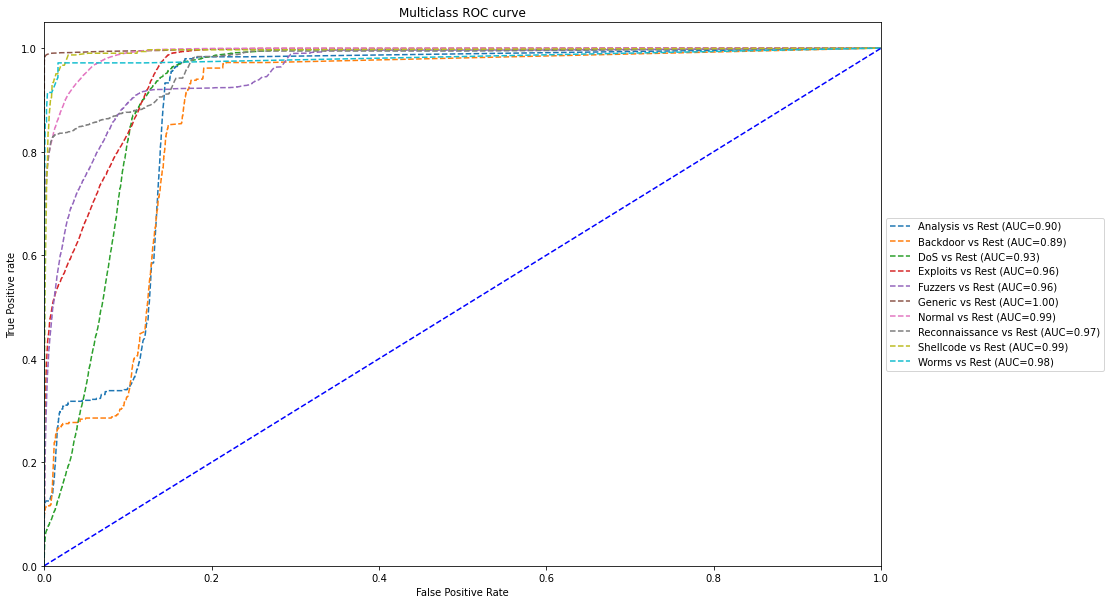

In [47]:
predict_RF_proba = RF.predict_proba(X_test)
multiclass_ROC(y_test,predict_RF_proba)

In [48]:
from sklearn.metrics import confusion_matrix
CM_RF_multiclass = confusion_matrix(y_test,predict_RF)
print('Confusion Matrix: RandomForest_Multiclass \n',CM_RF_multiclass)

Confusion Matrix: RandomForest_Multiclass 
 [[   63     0    82   307    36     0    47     0     0     0]
 [    0    46   104   274    38     0     0     2     2     0]
 [    3     1   710  2434    59     7    19    19    19     0]
 [    1     1   961  7423   206    16   123   136    35     3]
 [    0     0    87   493  3003     5  1239     3    19     0]
 [    0     2    36   147    12 11559     6     3     9     0]
 [    0     0     9   102   905     3 17561     7    13     0]
 [    0     1   128   533     4     2     7  2119     4     0]
 [    0     0     4    44    27     1    31     5   190     0]
 [    0     0     2    28     1     0     0     0     0     4]]


Testing with Logistic Regression

In [49]:
predict_lr = Lr.predict(X_test)
Lr.score(X_test,y_test)

0.7509459590569516

In [50]:
print("Classification Report: Logistic Regression \n", classification_report(y_test, predict_lr,digits=5))

Classification Report: Logistic Regression 
               precision    recall  f1-score   support

           0    0.64286   0.01682   0.03279       535
           1    0.00000   0.00000   0.00000       466
           2    0.33634   0.04555   0.08024      3271
           3    0.54698   0.80539   0.65150      8905
           4    0.52421   0.37740   0.43885      4849
           5    0.97678   0.97520   0.97599     11774
           6    0.84734   0.88478   0.86566     18600
           7    0.48545   0.57219   0.52526      2798
           8    0.00000   0.00000   0.00000       302
           9    0.00000   0.00000   0.00000        35

    accuracy                        0.75095     51535
   macro avg    0.43599   0.36773   0.35703     51535
weighted avg    0.72720   0.75095   0.72323     51535



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
roc_auc_score(y_test, Lr.predict_proba(X_test), multi_class='ovr')

0.9359239241577434

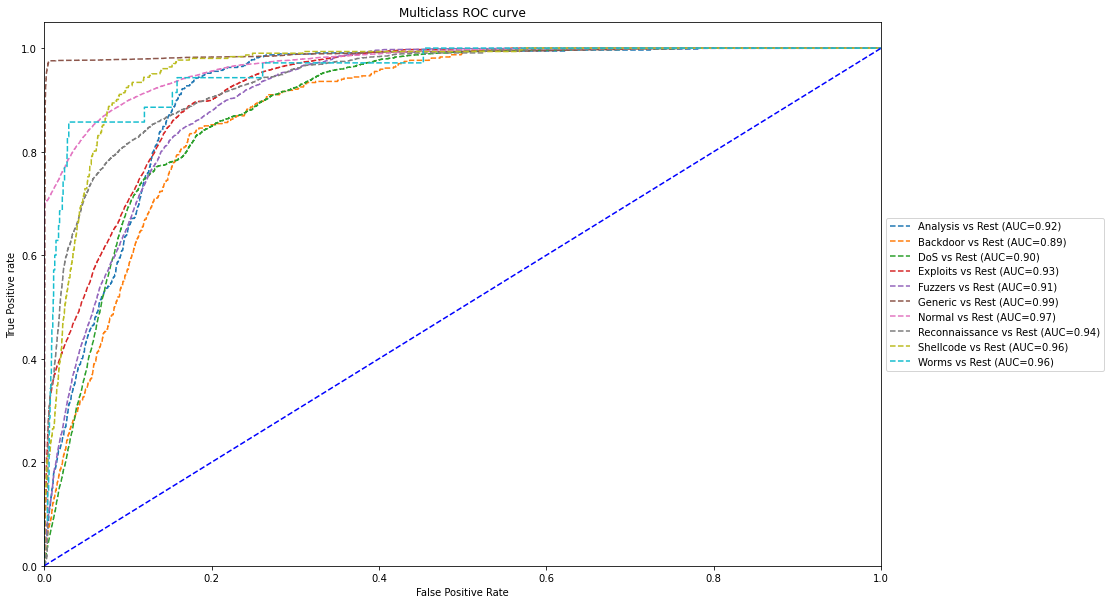

In [52]:
predict_lr_proba = Lr.predict_proba(X_test)
multiclass_ROC(y_test,predict_lr_proba)

In [53]:
from sklearn.metrics import confusion_matrix
CM_LR_multiclass = confusion_matrix(y_test,predict_lr)
print('Confusion Matrix: LogisticRegression_Multiclass \n',CM_LR_multiclass)

Confusion Matrix: LogisticRegression_Multiclass 
 [[    9     0    13   340    51    19    85    18     0     0]
 [    0     0    19   302    57     9    33    46     0     0]
 [    0     0   149  2475   123    63   204   257     0     0]
 [    2     0   170  7172   409    92   611   449     0     0]
 [    0     0    25   906  1830    45  1689   354     0     0]
 [    0     0     1   200    44 11482    23    24     0     0]
 [    3     0    19   861   860    22 16457   378     0     0]
 [    0     0    47   771    86    20   273  1601     0     0]
 [    0     0     0    57    29     0    46   170     0     0]
 [    0     0     0    28     2     3     1     1     0     0]]


Testing with KNN classifier

In [54]:
predict_knn = Knn.predict(X_test)
Knn.score(X_test,y_test)

0.7658484525080043

In [55]:
print("Classification Report: KNN \n", classification_report(y_test, predict_knn,digits=5))

Classification Report: KNN 
               precision    recall  f1-score   support

           0    0.09032   0.05234   0.06627       535
           1    0.04945   0.01931   0.02778       466
           2    0.31142   0.37359   0.33968      3271
           3    0.62770   0.67894   0.65232      8905
           4    0.52572   0.45948   0.49037      4849
           5    0.99705   0.97537   0.98609     11774
           6    0.87207   0.90048   0.88605     18600
           7    0.67759   0.58363   0.62711      2798
           8    0.61261   0.22517   0.32930       302
           9    0.25000   0.02857   0.05128        35

    accuracy                        0.76585     51535
   macro avg    0.50139   0.42969   0.44562     51535
weighted avg    0.76217   0.76585   0.76245     51535



In [56]:
roc_auc_score(y_test, Knn.predict_proba(X_test), multi_class='ovr')

0.7938749501989308

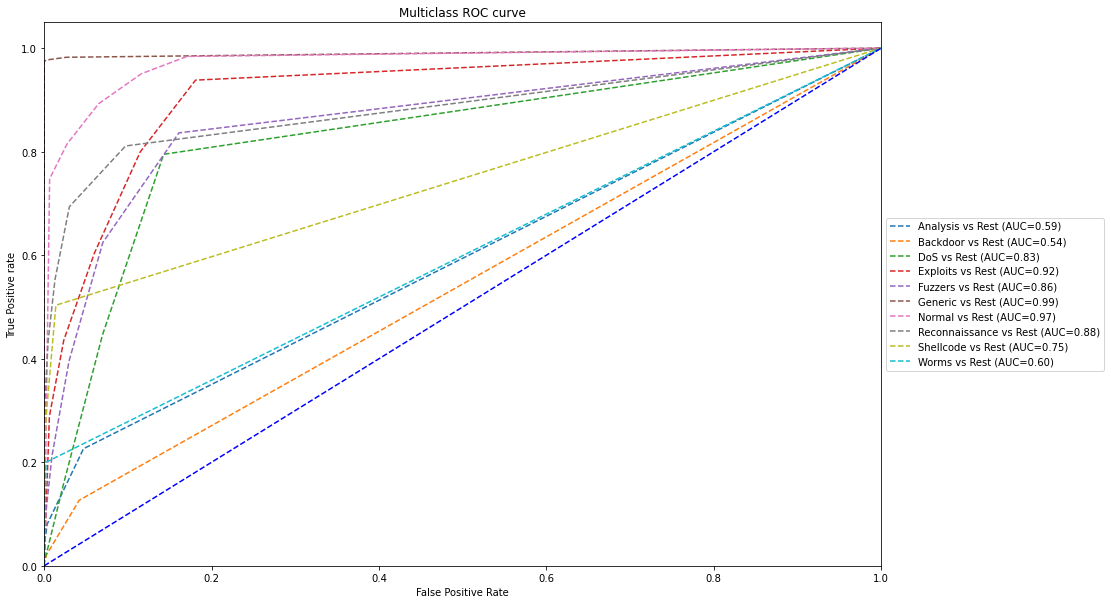

In [57]:
predict_knn_proba = Knn.predict_proba(X_test)
multiclass_ROC(y_test,predict_knn_proba)

In [58]:
from sklearn.metrics import confusion_matrix
CM_KNN_multiclass = confusion_matrix(y_test,predict_knn)
print('Confusion Matrix: KNN_Multiclass \n',CM_KNN_multiclass)

Confusion Matrix: KNN_Multiclass 
 [[   28    21   176   221    28     0    60     1     0     0]
 [   19     9   180   193    29     1    11    23     1     0]
 [   70    42  1222  1697    89     5    71    67     8     0]
 [  109    56  1766  6046   308    19   297   293     9     2]
 [   52    45   201   461  2228     6  1735   114     7     0]
 [    2     0    65   155    27 11484    25     8     7     1]
 [   26     2    68   257  1337     1 16749   155     5     0]
 [    4     6   237   555   137     1   220  1633     5     0]
 [    0     0     7    22    52     0    38   115    68     0]
 [    0     1     2    25     3     1     0     1     1     1]]


Testing Decision Tree

In [59]:
predict_dt = Dt.predict(X_test)
Dt.score(X_test,y_test)

0.8039584748229359

In [60]:
print("Classification Report: Decision Tree \n", classification_report(y_test, predict_dt,digits=5))

Classification Report: Decision Tree 
               precision    recall  f1-score   support

           0    0.33161   0.11963   0.17582       535
           1    0.45977   0.08584   0.14467       466
           2    0.32107   0.33629   0.32851      3271
           3    0.63635   0.74318   0.68563      8905
           4    0.61641   0.59022   0.60303      4849
           5    0.98797   0.98386   0.98591     11774
           6    0.91637   0.90720   0.91176     18600
           7    0.89889   0.74982   0.81761      2798
           8    0.62324   0.58609   0.60410       302
           9    0.51724   0.42857   0.46875        35

    accuracy                        0.80396     51535
   macro avg    0.63089   0.55307   0.57258     51535
weighted avg    0.80520   0.80396   0.80177     51535



In [61]:
roc_auc_score(y_test, Dt.predict_proba(X_test), multi_class='ovr')

0.8228025153077603

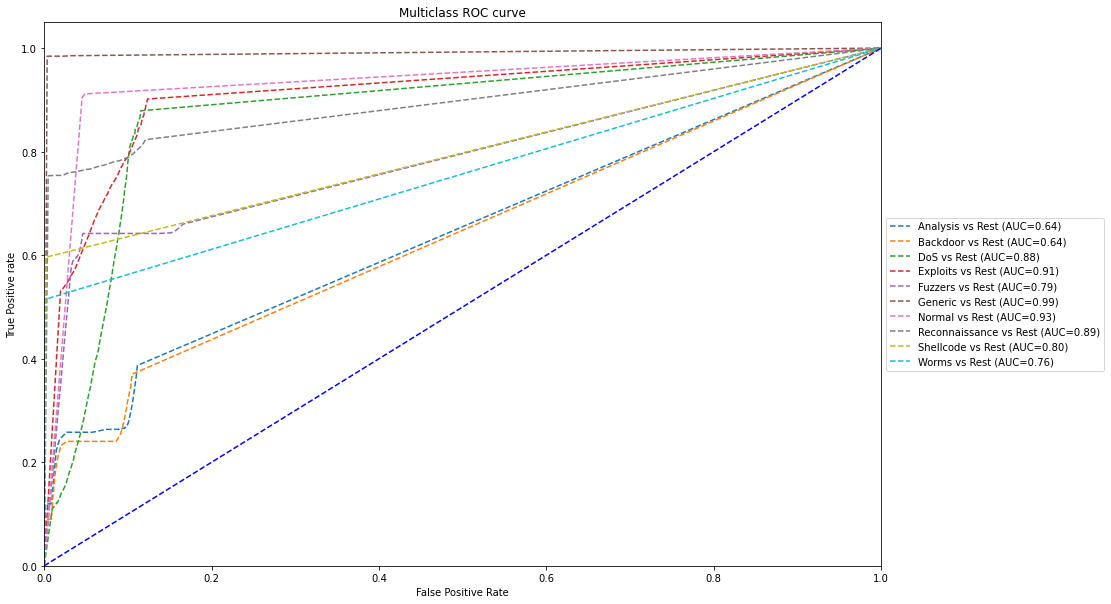

In [62]:
predict_dt_proba = Dt.predict_proba(X_test)
multiclass_ROC(y_test,predict_dt_proba)

In [63]:
from sklearn.metrics import confusion_matrix
CM_DT_multiclass = confusion_matrix(y_test,predict_dt)
print('Confusion Matrix: DecisionTree_Multiclass \n',CM_DT_multiclass)

Confusion Matrix: DecisionTree_Multiclass 
 [[   64     2   123   272    33     0    41     0     0     0]
 [    1    40   148   233    32     6     1     3     2     0]
 [   12     8  1100  2033    46    15    24    20    12     1]
 [   27    18  1611  6618   209    89   127   174    24     8]
 [   18     7   143   466  2862    13  1301    11    28     0]
 [    0     3    56    98    15 11584     5     2    10     1]
 [   71     4    35   142  1420     7 16874    18    27     2]
 [    0     3   194   478     7     6     8  2098     4     0]
 [    0     2    14    44    19     4    32     8   177     2]
 [    0     0     2    16     0     1     1     0     0    15]]


Testing with ANN

In [68]:
y_l_test=le.fit_transform(y02_test)
predict_ann = model.predict(x_k02_test)

classes_x=np.argmax(predict_ann,axis=1)
model.evaluate(x_k02_test,y_l_test)




934/934 [==============================] - 3s 3ms/step - loss: 3.5811 - accuracy: 0.0981


[3.5811283588409424, 0.09814883023500443]

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()
for i in range(n_classes):
    fpr2[i], tpr2[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])

# Compute micro-average ROC curve and ROC area
fpr2["micro"], tpr2["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc2["micro"] = auc(fpr2["micro"], tpr2["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr2[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr2[i], tpr2[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr2["macro"] = all_fpr
tpr2["macro"] = mean_tpr
roc_auc2["macro"] = auc(fpr2["macro"], tpr2["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr2["micro"], tpr2["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc2["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr2["macro"], tpr2["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc2["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr2[i], tpr2[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc2[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr2["micro"], tpr2["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc2["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr2["macro"], tpr2["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc2["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr2[i], tpr2[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc2[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [17]:
y_pred_keras = model.predict(x_k02_test).ravel()
multiclass_ROC(y02_test.ravel(),y_pred_keras)

934/934 [==============================] - 4s 4ms/step


2022-06-14 20:31:10.910086: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 13502596 exceeds 10% of free system memory.


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [81]:
le.inverse_transform(y_l_test)

array(['lydia', 'lydia', 'lydia', ..., 'yakovlev', 'yakovlev', 'yakovlev'],
      dtype=object)

In [72]:
type(predict_ann)

numpy.ndarray

In [80]:
print("Classification Report: \n", classification_report(y_l_test, classes_x,digits=5))

Classification Report: 
               precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000        56
           1    0.00000   0.00000   0.00000        30
           2    0.01110   0.50000   0.02171        56
           3    0.00194   1.00000   0.00388         2
           4    0.00922   1.00000   0.01826         6
           5    0.02128   0.02532   0.02312        79
           6    0.00000   0.00000   0.00000         2
           7    0.00000   0.00000   0.00000        10
           8    0.00000   0.00000   0.00000        18
           9    0.00000   0.00000   0.00000        18
          10    0.00000   0.00000   0.00000         2
          11    0.00000   0.00000   0.00000         4
          12    0.90349   0.99451   0.94682       546
          13    0.02614   0.18182   0.04571        22
          14    0.00000   0.00000   0.00000        91
          15    1.00000   1.00000   1.00000        27
          16    0.76693   0.98420   0.86209       886
  

/home/lizard/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lizard/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lizard/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
roc_auc_score(y_l_test, model.predict_proba(x_k02_test), multi_class='ovr')

AttributeError: 'Sequential' object has no attribute 'predict_proba'

test for XGB classifier

In [26]:
predict_xg = Xg.predict(X_test)
Xg.score(X_test,y_test)

0.8343261860871253

In [29]:
print("Classification Report: \n", classification_report(y_test, predict_xg,digits=5))

Classification Report: 
               precision    recall  f1-score   support

           0    0.86364   0.10654   0.18968       535
           1    0.90385   0.10086   0.18147       466
           2    0.44162   0.14338   0.21648      3271
           3    0.62854   0.89972   0.74007      8905
           4    0.71696   0.57723   0.63955      4849
           5    0.99553   0.98318   0.98932     11774
           6    0.90980   0.94903   0.92900     18600
           7    0.92394   0.76412   0.83646      2798
           8    0.68293   0.74172   0.71111       302
           9    0.71875   0.65714   0.68657        35

    accuracy                        0.83433     51535
   macro avg    0.77855   0.59229   0.61197     51535
weighted avg    0.83170   0.83433   0.81678     51535



In [30]:
roc_auc_score(y_test, Xg.predict_proba(X_test), multi_class='ovr')

0.970170857470422

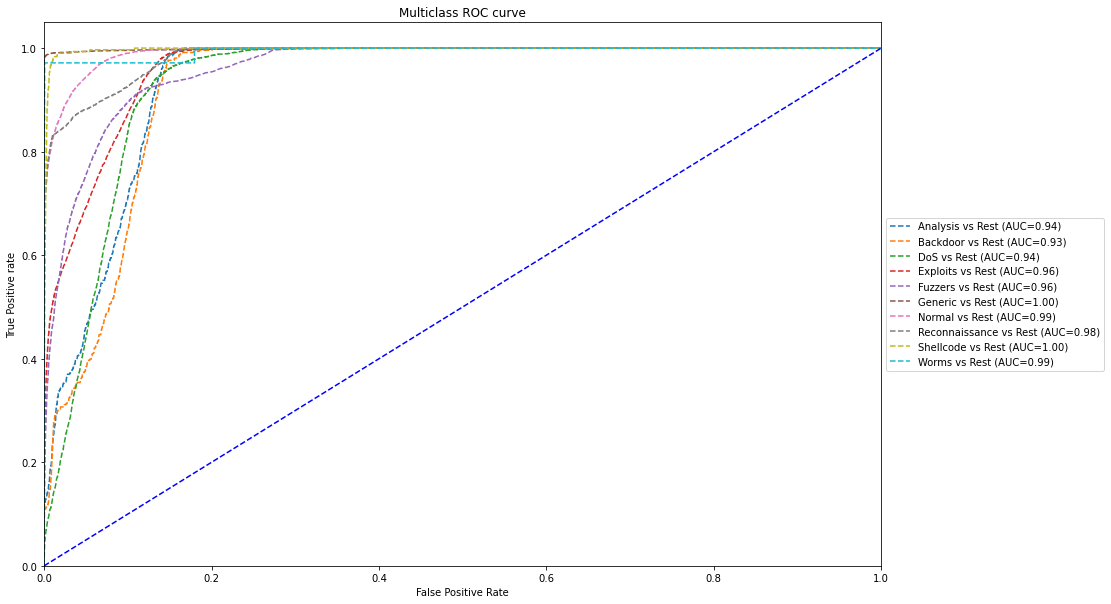

In [33]:
predict_xgb_proba = Xg.predict_proba(X_test)
multiclass_ROC(y_test,predict_xgb_proba)

In [ ]:
from sklearn.metrics import confusion_matrix
CM_xgboost_multiclass = confusion_matrix(y_test,predict_xg)
print('Confusion Matrix: XGboost_Multiclass \n',CM_xgboost_multiclass)

Testing with Adaboost

In [64]:
predict_ada = Ada.predict(X_test)
Ada.score(X_test,y_test)

0.6660327932473077

In [65]:
print("Classification Report: Adaboost \n", classification_report(y_test, predict_ada,digits=5))

Classification Report: Adaboost 
               precision    recall  f1-score   support

           0    0.04242   0.55140   0.07878       535
           1    0.04762   0.04506   0.04631       466
           2    0.32422   0.13421   0.18984      3271
           3    0.60235   0.51286   0.55401      8905
           4    0.50804   0.28666   0.36651      4849
           5    0.91454   0.96883   0.94090     11774
           6    0.83646   0.76887   0.80124     18600
           7    0.67270   0.65082   0.66158      2798
           8    0.43915   0.27483   0.33809       302
           9    0.00000   0.00000   0.00000        35

    accuracy                        0.66603     51535
   macro avg    0.43875   0.41935   0.39773     51535
weighted avg    0.72327   0.66603   0.68555     51535



In [66]:
roc_auc_score(y_test, Ada.predict_proba(X_test), multi_class='ovr')

0.7798279918499864

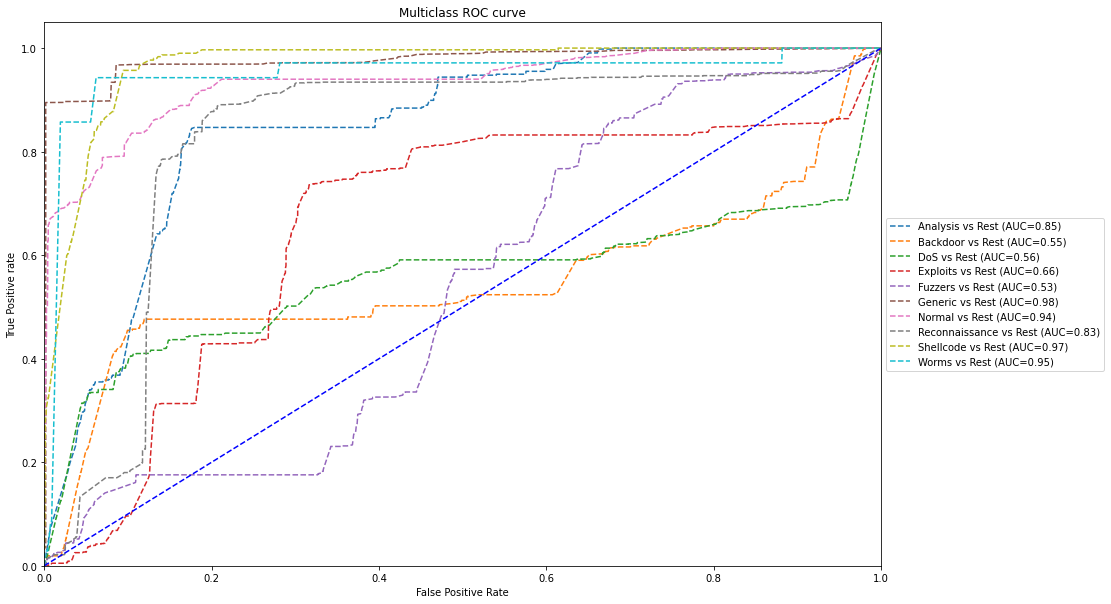

In [67]:
predict_ada_proba = Ada.predict_proba(X_test)
multiclass_ROC(y_test,predict_ada_proba)

In [68]:
from sklearn.metrics import confusion_matrix
CM_Adaboost_multiclass = confusion_matrix(y_test,predict_ada)
print('Confusion Matrix: Adaboos_Multiclass \n',CM_Adaboost_multiclass)

Confusion Matrix: Adaboos_Multiclass 
 [[  295     5    73    89     0    65     8     0     0     0]
 [  264    21    59    19     3    45    13    42     0     0]
 [ 1727   142   439   525    45   221    64    89    19     0]
 [ 2562   198   606  4567   146   264   278   264    19     1]
 [  341    30   102   321  1390   282  2203   150    30     0]
 [   46     8     9   167    39 11407    71    21     6     0]
 [ 1425     0     3  1500  1002   148 14301   192    28     1]
 [  293    37    62   340    84    37   120  1821     4     0]
 [    0     0     1    24    25     4    37   128    83     0]
 [    1     0     0    30     2     0     2     0     0     0]]


GradientBoost Classifier

In [87]:
predict_gradboost = gradboost.predict(X_test)
gradboost.score(X_test,y_test)

0.8102066556709032

In [88]:
print("Classification Report: GradientBoost \n", classification_report(y_test, predict_gradboost,digits=5))

Classification Report: GradientBoost 
               precision    recall  f1-score   support

           0    0.95455   0.03925   0.07540       535
           1    0.83721   0.07725   0.14145       466
           2    0.38757   0.12015   0.18343      3271
           3    0.60069   0.87524   0.71243      8905
           4    0.67413   0.50299   0.57612      4849
           5    0.99541   0.97588   0.98555     11774
           6    0.88287   0.92597   0.90390     18600
           7    0.90138   0.76769   0.82918      2798
           8    0.65424   0.63907   0.64657       302
           9    0.12687   0.48571   0.20118        35

    accuracy                        0.81021     51535
   macro avg    0.70149   0.54092   0.52552     51535
weighted avg    0.80823   0.81021   0.79136     51535



In [89]:
roc_auc_score(y_test, gradboost.predict_proba(X_test), multi_class='ovr')

0.959657291208179

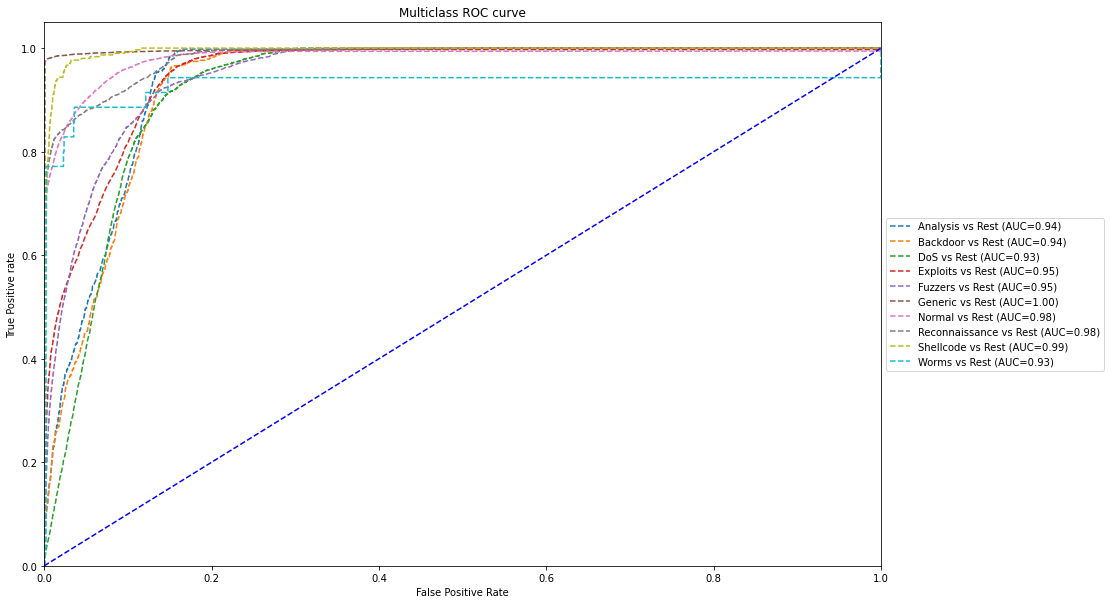

In [90]:
predict_gradboost_proba = gradboost.predict_proba(X_test)
multiclass_ROC(y_test,predict_gradboost_proba)

In [91]:
from sklearn.metrics import confusion_matrix
CM_gradboost_multiclass = confusion_matrix(y_test,predict_gradboost)
print('Confusion Matrix: Gradboost_Multiclass \n',CM_gradboost_multiclass)

Confusion Matrix: Gradboost_Multiclass 
 [[   21     0    49   385     0     0    80     0     0     0]
 [    0    36    38   375     5     1     7     2     2     0]
 [    0     1   393  2689    48     4    81    29    25     1]
 [    0     3   421  7794   132    41   309   167    31     7]
 [    0     0    42   613  2439     2  1727     8    18     0]
 [    0     2     4   201    37 11490    30     4     5     1]
 [    1     0     1   309   921     2 17223    18    17   108]
 [    0     1    65   555     5     2    18  2148     4     0]
 [    0     0     1    39    29     1    32     7   193     0]
 [    0     0     0    15     2     0     1     0     0    17]]


Extra Tree Classifer

In [79]:
predict_extree = Ex_tree.predict(X_test)
Ex_tree.score(X_test,y_test)

0.8234597846123993

In [80]:
print("Classification Report: EXTRA tree  \n", classification_report(y_test, predict_extree,digits=5))

Classification Report: EXTRA tree  
               precision    recall  f1-score   support

           0    0.53704   0.10841   0.18040       535
           1    0.67164   0.09657   0.16886       466
           2    0.33636   0.30572   0.32031      3271
           3    0.64364   0.78776   0.70844      8905
           4    0.70049   0.61497   0.65495      4849
           5    0.99698   0.98123   0.98904     11774
           6    0.91778   0.94220   0.92983     18600
           7    0.91143   0.74660   0.82083      2798
           8    0.67073   0.54636   0.60219       302
           9    0.50000   0.14286   0.22222        35

    accuracy                        0.82346     51535
   macro avg    0.68861   0.52727   0.55971     51535
weighted avg    0.82290   0.82346   0.81757     51535



In [81]:
roc_auc_score(y_test, Ex_tree.predict_proba(X_test), multi_class='ovr')

0.9037817204605654

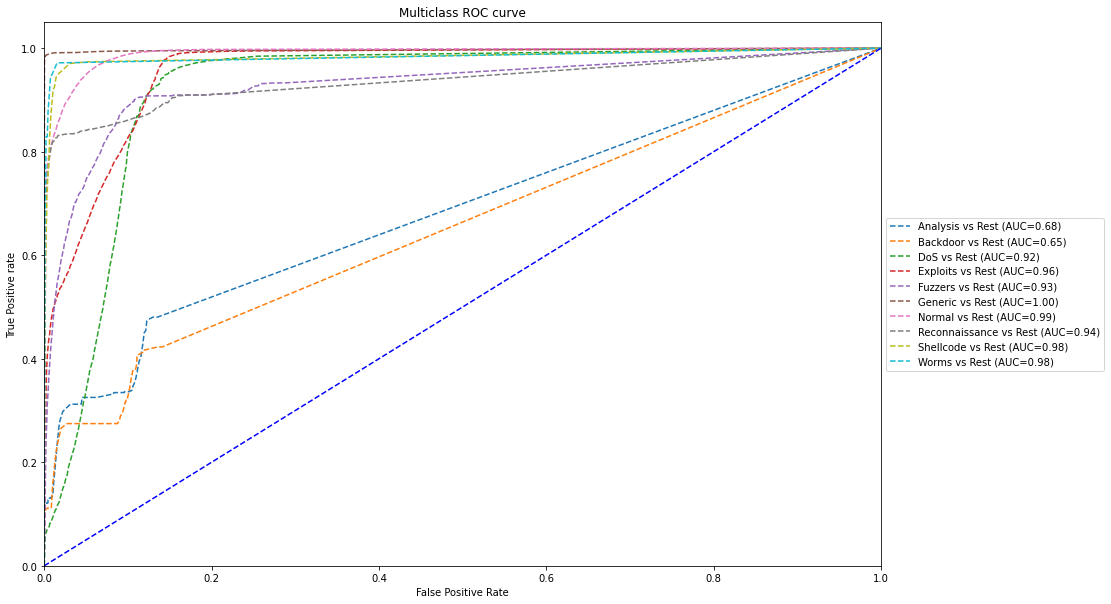

In [82]:
predict_extree_proba = Ex_tree.predict_proba(X_test)
multiclass_ROC(y_test,predict_extree_proba)

In [83]:
from sklearn.metrics import confusion_matrix
CM_extraTree_multiclass = confusion_matrix(y_test,predict_extree)
print('Confusion Matrix: Extra Tree_Multiclass \n',CM_extraTree_multiclass)

Confusion Matrix: Extra Tree_Multiclass 
 [[   58     2   123   271    32     0    49     0     0     0]
 [    1    45   145   239    31     0     0     2     3     0]
 [   11     4  1000  2136    51     5    31    20    12     1]
 [   18     9  1345  7015   188    16   160   125    27     2]
 [   18     4   124   438  2982     6  1249    14    13     1]
 [    0     2    41   143    15 11553     9     3     7     1]
 [    2     0     9    97   927     4 17525    23    13     0]
 [    0     1   180   490     7     3    22  2089     6     0]
 [    0     0     4    43    23     1    50    16   165     0]
 [    0     0     2    27     1     0     0     0     0     5]]
